In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preplacementdata.csv")

In [3]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
dataset.cov(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,9.017549e+05
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,7.633598e+05
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,4.651315e+05
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,3.842344e+05
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,1.262455e+05
salary,901754.893936,763359.777657,465131.504238,384234.419257,126245.485547,2.395714e+10


In [6]:
# Covarience Results
#1. Positive Covarience Exists between degree_p and etest_p with a Covarience value of 21.92%
#2. Positive Covarience Exists between mba_p and etest_p with a Covarience value of 16.88%
#3. Positive Covarience Exists between ssc_p and mmba_p with a Covarience value of 24.53% <Just want to see the numbers so i Checked this >

In [7]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [8]:
# Correlation Results
# Correlation between mba_p and Salary is 0.13 , looks like a Zero Correlation or do i have convert into %

In [9]:
import seaborn as sns

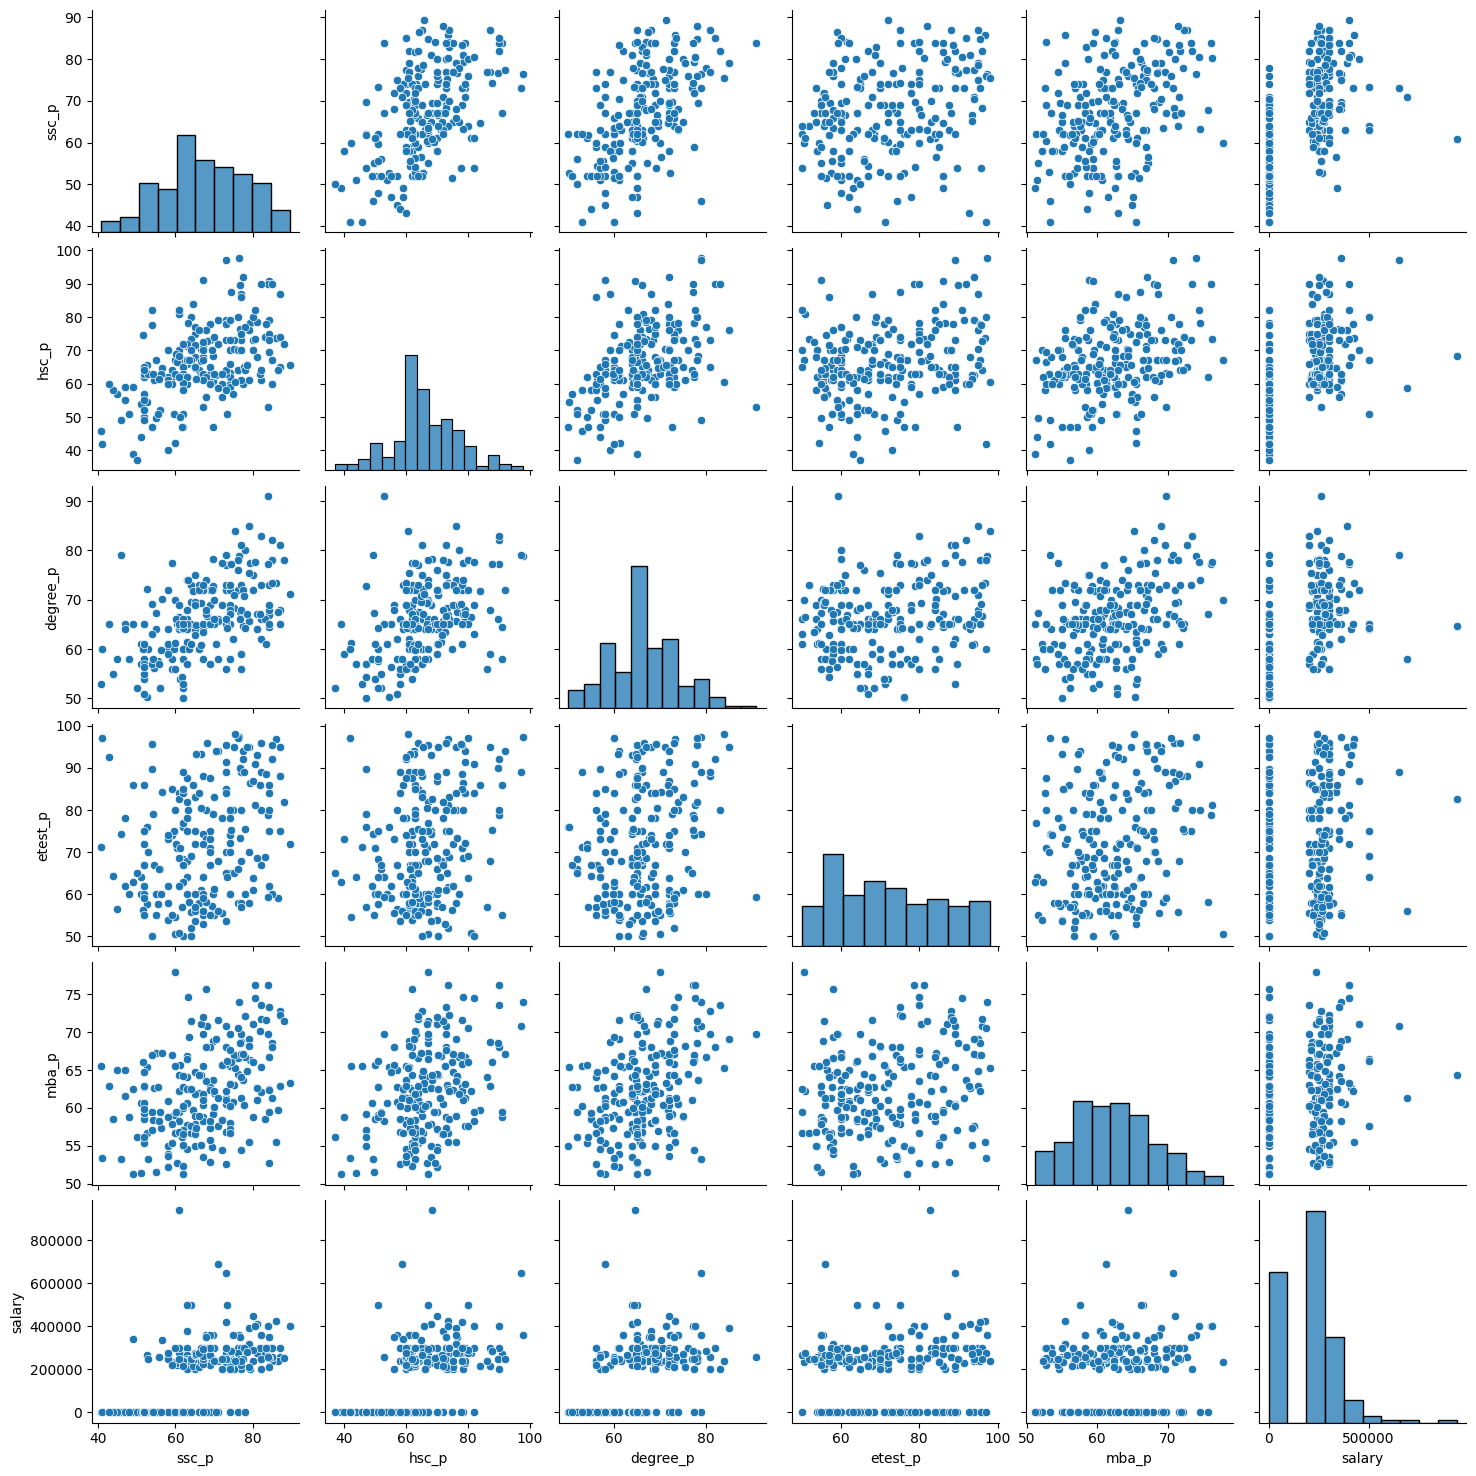

In [10]:
sns.pairplot(dataset)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [12]:
calc_vif(dataset[["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]])

,variables,VIF
0,ssc_p,76.496603
1,hsc_p,58.972066
2,degree_p,113.299298
3,etest_p,32.679659
4,mba_p,114.025972
5,salary,3.931112


In [13]:
calc_vif(dataset[["hsc_p","salary"]])

,variables,VIF
0,hsc_p,3.116876
1,salary,3.116876


In [14]:
calc_vif(dataset[["mba_p","salary"]])

,variables,VIF
0,mba_p,2.707661
1,salary,2.707661


In [15]:
# 1. Select only the numeric predictor columns
numeric_predictors = dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]

# 2. Now, run your function on this new DataFrame
vif_scores = calc_vif(numeric_predictors)

# 3. Print the results
print(vif_scores)

  variables         VIF
0     ssc_p   66.944193
1     hsc_p   56.084529
2  degree_p  112.708420
3   etest_p   32.672247
4     mba_p   99.284247


In [16]:
# 1. Creating  new 'academic_score' feature
dataset['academic_score'] = dataset[['ssc_p', 'hsc_p', 'degree_p']].mean(axis=1)

# 2. Now, test the VIF of this new feature against the others
# We can use academic_score, etest_p, and mba_p
predictors_new = dataset[['academic_score', 'etest_p', 'mba_p']]

print(calc_vif(predictors_new))

        variables        VIF
0  academic_score  89.300723
1         etest_p  32.601580
2           mba_p  88.512371


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np

In [18]:
# Create a copy to avoid changing your original 'dataset'
model_data = dataset.copy()

# Drop rows where 'salary' is missing
model_data.dropna(subset=['salary'], inplace=True)

# Define  X and y
predictors = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
X = model_data[predictors]
y = model_data['salary']

# --- CRITICAL STEP: Scale your predictors ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# You can also split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Ready to train model on {X_train.shape[0]} samples.")

Ready to train model on 150 samples.


In [19]:
# Define a range of alphas (penalties) to test.
# test 100 values between 0.1 and 100.
alphas_to_test = np.logspace(-1, 2, 100)

# Create the RidgeCV model
# cv=None uses efficient Leave-One-Out Cross-Validation
ridge_model = RidgeCV(alphas=alphas_to_test, cv=None)

# Fit the model
ridge_model.fit(X_train, y_train)

# 1. This is the best alpha (penalty) the model chose
print(f"Best alpha found: {ridge_model.alpha_:.4f}")

# 2. Check the model's score (R-squared) on the test set
test_score = ridge_model.score(X_test, y_test)
print(f"Model R-squared on test data: {test_score:.4f}")

Best alpha found: 17.4753
Model R-squared on test data: 0.2797


In [20]:
# Create a series to see the coefficients clearly
coefficients = pd.Series(ridge_model.coef_, index=predictors)

print("\nModel Coefficients:")
print(coefficients.sort_values(ascending=False))


Model Coefficients:
ssc_p       45832.097987
hsc_p       34572.883454
degree_p    30493.043157
etest_p     13859.146721
mba_p      -21225.567004
dtype: float64
